In [41]:
import seaborn as sns
import os
from dataclasses import dataclass
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from typing import *

df = pd.read_table("../mapping_stat.tsv")
columns = df.columns.to_list()
df = df.drop_duplicates()

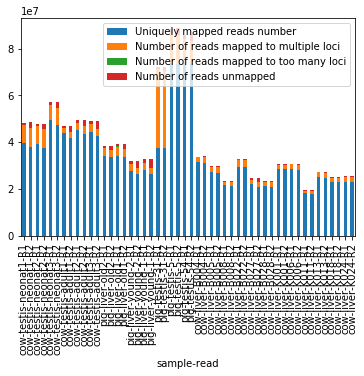

In [42]:
# Number of reads:
df1 = pd.DataFrame(df, columns=columns)

df1["Number of reads unmapped"] = (df1['Number of input reads'] - 
                                  (df1['Uniquely mapped reads number'] +  
                                   df1['Number of reads mapped to multiple loci'] + 
                                   df1['Number of chimeric reads']))  

sample = df1["sample"].to_list()
read = df1["read"].to_list()
sample_read_names = [i + "-" + j for i, j in zip(sample, read)] 

df1["sample-read"] = sample_read_names

columns_clean = ['sample', 'sample_unit', 'read', 'sample-read', 'Uniquely mapped reads number', 
                 'Number of reads mapped to multiple loci', 'Number of reads mapped to too many loci',
                 'Number of reads unmapped']

df_clean = pd.DataFrame(df1, columns=columns_clean)

df_clean.plot.bar(x='sample-read', stacked=True);

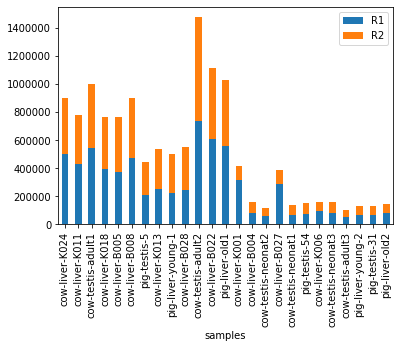

In [57]:
# Number of chimeric reads:
columns_df2 = ['sample', 'sample_unit', 'read', 'sample-read', 'Number of chimeric reads']
df2 = pd.DataFrame(df1, columns=columns_df2)

samples = list(set(df2["sample"].to_list()))
nb_cr_R1 = df2["Number of chimeric reads"][df2["read"]=="R1"].to_list()
nb_cr_R2 = df2["Number of chimeric reads"][df2["read"]=="R2"].to_list()

data = {'samples': samples, 'R1': nb_cr_R1, 'R2': nb_cr_R2}

df3 = pd.DataFrame(data)

df3.plot.bar(x='samples', stacked=True);

In [7]:
# Number of annotated / non-canonical junction splices:
columns_df3 = ['sample', 'sample_unit', 'read', 'sample-read', 'Number of splices: Total', 
               'Number of splices: Annotated (sjdb)', 'Number of splices: GT/AG', 'Number of splices: GC/AG', 
               'Number of splices: AT/AC', 'Number of splices: Non-canonical']

df3 = pd.DataFrame(df1, columns=columns_df3)

df3["% of splices: GT/AG"] = ((df3["Number of splices: GT/AG"] * 100) / df3["Number of splices: Total"])
df3["% of splices: GC/AG"] = ((df3["Number of splices: GC/AG"] * 100) / df3["Number of splices: Total"])
df3["% of splices: AT/AC"] = ((df3["Number of splices: AT/AC"] * 100) / df3["Number of splices: Total"])
df3["% of splices: Non-canonical"] = ((df3["Number of splices: Non-canonical"] * 100) / 
                                       df3["Number of splices: Total"])
df3["% of splices: Annotated (sjdb)"] = ((df3["Number of splices: Annotated (sjdb)"] * 100) / df3["Number of splices: Total"])
df3["Number of splices: Non annotated (sjdb)"] = df3["Number of splices: Total"] - df3["Number of splices: Annotated (sjdb)"]
df3["% of splices: Non annotated (sjdb)"] = ((df3["Number of splices: Non annotated (sjdb)"] * 100) / df3["Number of splices: Total"])

#df3.plot.bar(x='sample-read', stacked=True);